# Data Cleaning, Tokenization, and Naive Bayes Classification on IMDb Dataset

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. 

we have to predict the number of positive and negative reviews based on sentiments by using different classification models

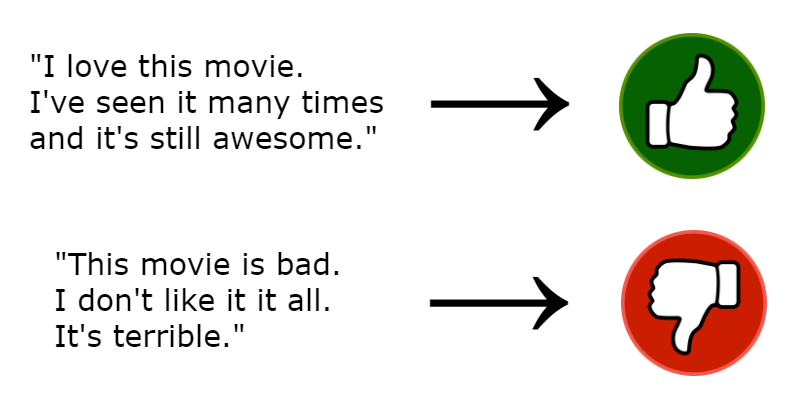

Importing and installing relevant libraries

In [200]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TANVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TANVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ca/4a/49ceaa60945f2e0077c25117dd99c7e6efdea9cc970787d0637a36e39014/wordcloud-1.9.2-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   ------------------------------------- -- 143.4/153.3 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00


In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import os
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score,confusion_matrix,f1_score,roc_auc_score

Data preprocessing

In [202]:
df=pd.read_csv('IMDB.csv')

In [203]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [204]:
df.head(10) 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [205]:
df.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [206]:
df.shape

(50000, 2)

In [207]:
df.shape[0]

50000

In [208]:
df.shape[1]

2

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [210]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Hanndling missing value

In [211]:
df.isnull().values.any()

False

In [212]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [213]:
df.columns

Index(['review', 'sentiment'], dtype='object')

Checking duplicates value

In [214]:
df.duplicated().sum()

418

In [215]:
df.drop_duplicates(inplace=True)

In [216]:
df.duplicated().sum()

0

Encoding categorical data

In [217]:
df.sentiment.replace("positive",1,inplace=True)
df.sentiment.replace("negative",0,inplace=True)

In [218]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Data visualization

Text(0.5, 1.0, 'IMDB dataset')

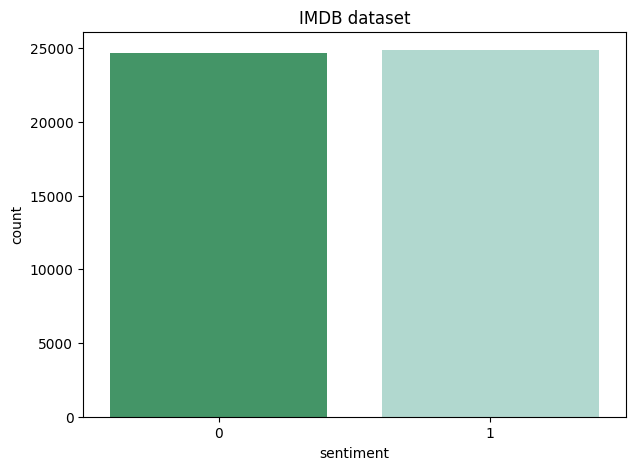

In [219]:
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment',data=df,palette="BuGn_r")
plt.title("IMDB dataset")

<Axes: xlabel='sentiment', ylabel='Count'>

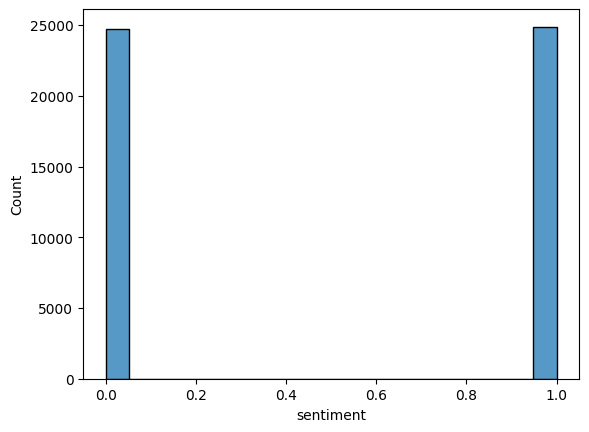

In [220]:
sns.histplot(data=df['sentiment'])

In [221]:
for i in range(10):
    print(i)
    print(df['review'].iloc[i],'\n')
    print(df['sentiment'].iloc[i],'\n\n')

0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

Text preprocessing

In [222]:

df['review'] = df['review'].str.lower()
df.head()
     

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [223]:
def words(text):
    word=text.split()
    count=len(word)
    return count



In [224]:
df['count']=df['review'].apply(words)
df.head(10)

,review,sentiment,count
0,one of the other reviewers has mentioned that ...,1,307
1,a wonderful little production. <br /><br />the...,1,162
2,i thought this was a wonderful way to spend ti...,1,166
3,basically there's a family where a little boy ...,0,138
4,"petter mattei's ""love in the time of money"" is...",1,230
5,"probably my all-time favorite movie, a story o...",1,119
6,i sure would like to see a resurrection of a u...,1,150
7,"this show was an amazing, fresh & innovative i...",0,174
8,encouraged by the positive comments about this...,0,130
9,if you like original gut wrenching laughter yo...,1,33


In [230]:
def processing(text):
    text=text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    #tokenize
    tokens = word_tokenize(text)
    
    
    filtered_text = [w for w in tokens if not w in stop_words]
    return " ".join(filtered_text)


     

In [231]:
df.review = df['review'].apply(processing)

In [232]:
df.duplicated().sum()

0

In [233]:
df.drop_duplicates(inplace=True)

In [234]:
df.duplicated().sum()

0

Stemming

In [235]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [239]:
df.review=df['review'].apply(lambda x:stemming(x))

There will be change in count

In [237]:
df['count']=df['review'].apply(words)
df.head()

,review,sentiment,count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


Visualizing the reviews using word cloud

# Positive reviews

In [238]:
positive=df[df.sentiment==1]
positive.head()

,review,sentiment,count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


Text(0.5, 1.0, 'POSITIVE REVIEWS')

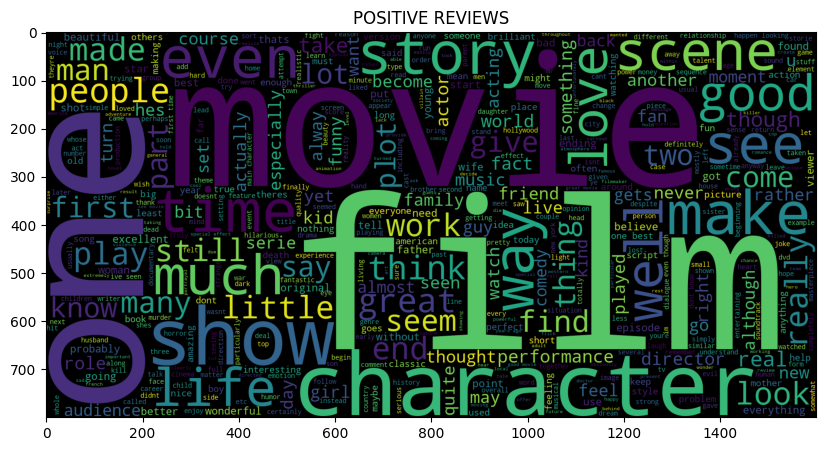

In [122]:
data=' '.join([word for word in positive['review']])
plt.figure(figsize=(12,5),facecolor='None')

WC=WordCloud(max_words=500,width=1600,height=800).generate(data)
plt.imshow(WC)
plt.title('POSITIVE REVIEWS')

Most frequent words

In [123]:
from collections import Counter
count=Counter()

for data in positive['review'].values:
    for word in data.split():
        count[word]+=1
count.most_common(5)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281)]

In [124]:
positive_words=pd.DataFrame(count.most_common(10))
positive_words.columns=['word','count']
positive_words.head(10)

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281
5,great,12568
6,story,12338
7,see,11814
8,time,11724
9,well,10930


Visualization using bar chart

In [53]:
pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/26/5d/1e13b597ed8e54803e9ac6ded18c04cd35d8cbc49016778ec50c4ca9e9d5/plotly-5.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/15.6 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/15.6 MB 20.0 MB/s eta 0:00:01
   ------- -------------------------------- 3.0/15.6 MB 24.2 MB/s eta 0:00:01
   --------- ------------------------------ 3.8/15.6 MB 22.2 MB/s eta 0:00:01
   ----------- ---------------------------- 4.7/15.6 MB 21.4 MB/s eta 0:00:01
   ------------- -------------------------- 5.2/15.6 MB 19.6 MB/s

In [54]:
import plotly.express as px

In [125]:
px.bar(positive_words,x='count',y='word',title='common positive words',color='word')

Text(0.5, 1.0, 'Positive Words')

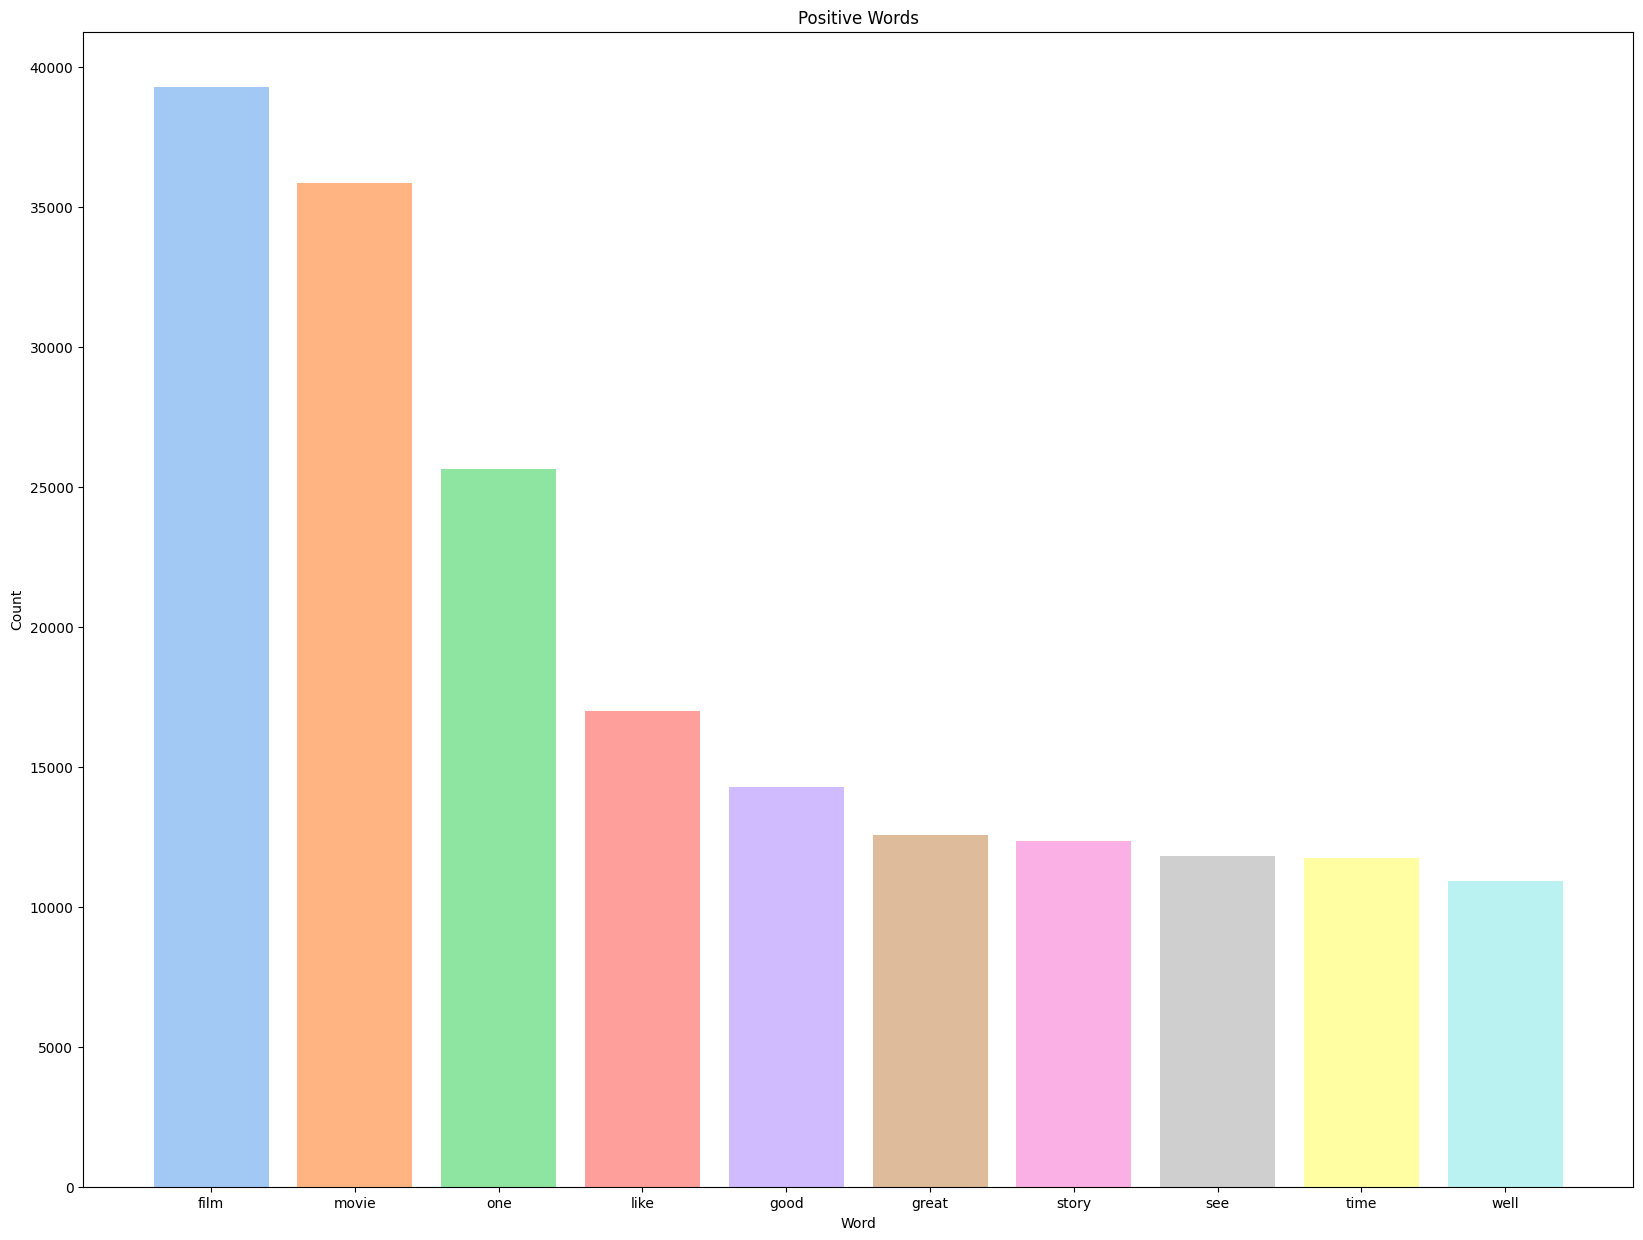

In [126]:
pos_words = positive_words.head(10)
colors = sns.color_palette('pastel', n_colors=len(pos_words))
plt.figure(figsize=(20,15))
plt.bar(pos_words['word'],pos_words['count'],color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Positive Words')


# Negative reviews

In [127]:
negative=df[df.sentiment==0]
negative.head()

,review,sentiment,count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


Text(0.5, 1.0, 'NEGATIVE REVIEWS')

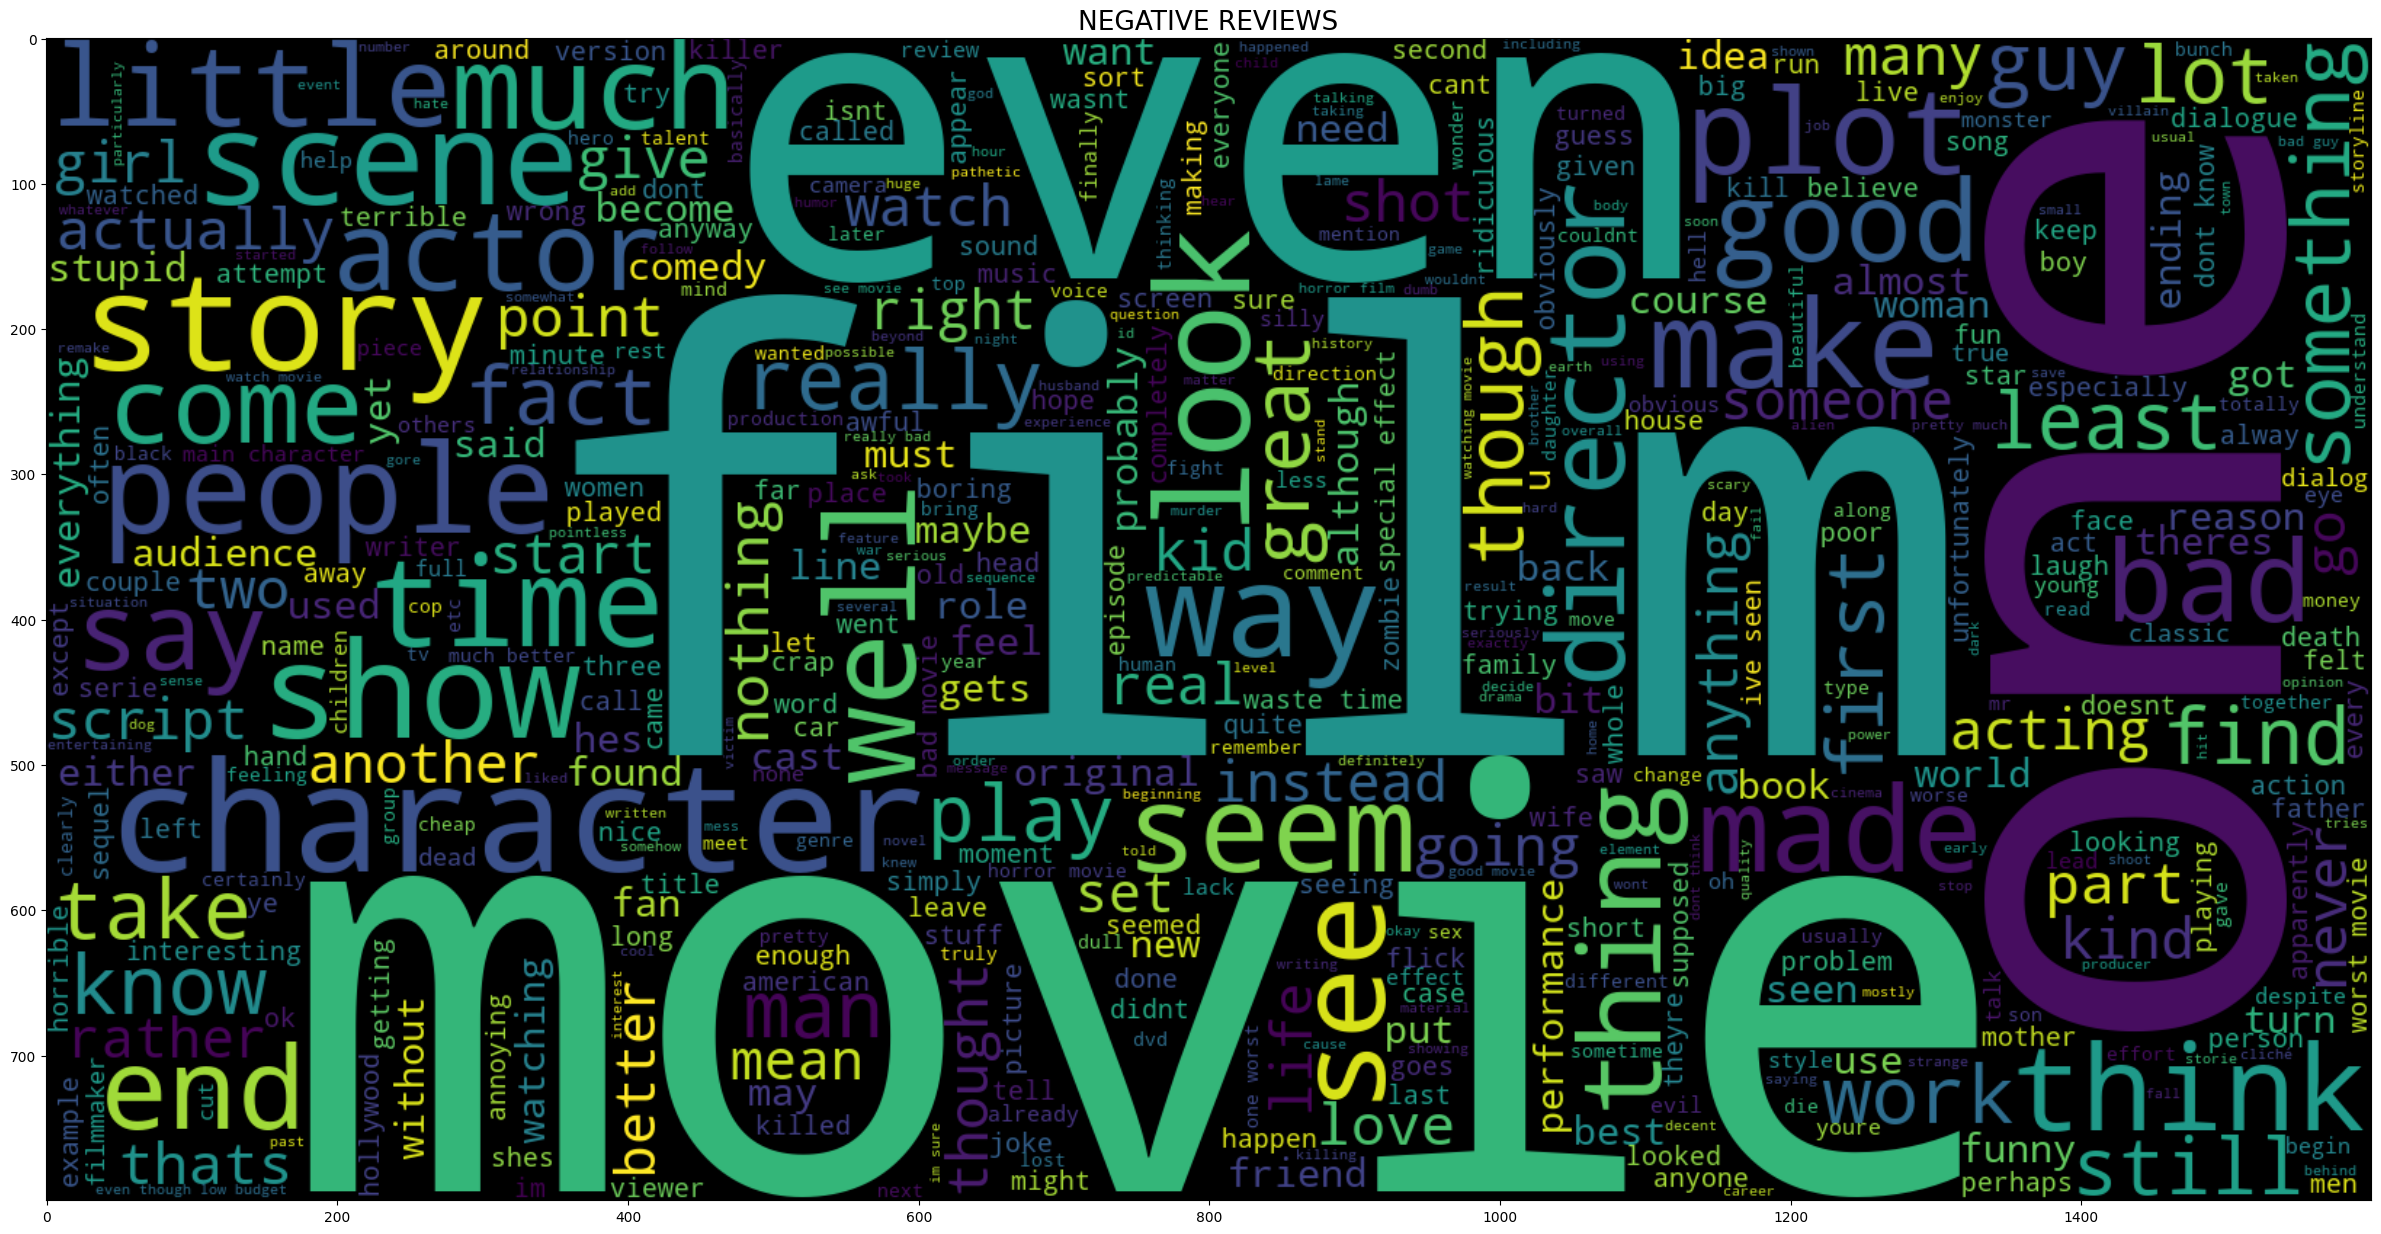

In [128]:
data=' '.join([word for word in negative['review']])
plt.figure(figsize=(30,20),facecolor='None')

WC=WordCloud(max_words=500,width=1600,height=800).generate(data)
plt.imshow(WC,interpolation='bilinear')
plt.title('NEGATIVE REVIEWS',fontsize=19)

In [129]:
count=Counter()

for data in negative['review'].values:
    for word in data.split():
        count[word]+=1
count.most_common(15)

[('movie', 47002),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14760),
 ('good', 13996),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9564)]

In [130]:
negative_words=pd.DataFrame(count.most_common(10))
negative_words.columns=['word','count']
negative_words.head(10)

,word,count
0,movie,47002
1,film,34651
2,one,24361
3,like,21508
4,even,14760
5,good,13996
6,bad,13903
7,would,13482
8,really,12084
9,time,11349


In [131]:
px.bar(negative_words,x='count',y='word',title='common positive words',color='word')

Text(0.5, 1.0, 'Negative Words')

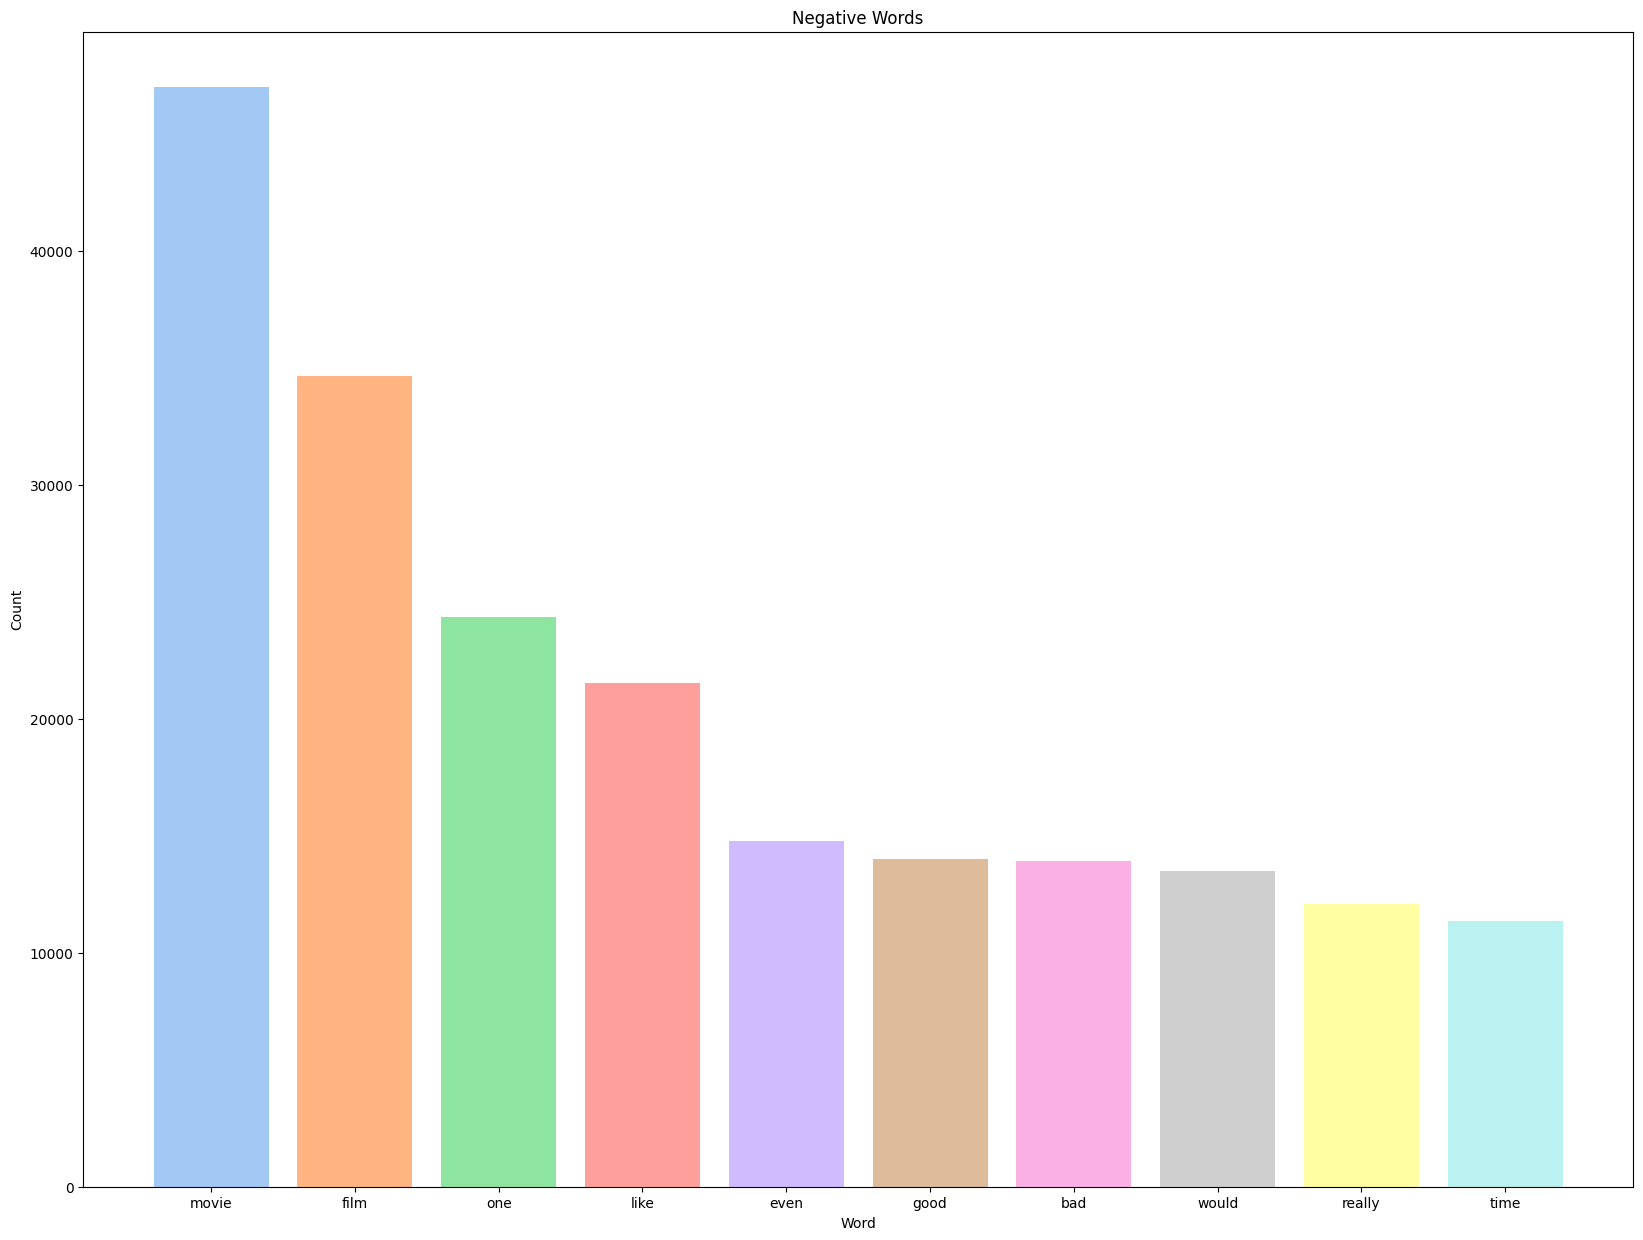

In [132]:
neg_words = negative_words.head(10)
colors = sns.color_palette('pastel', n_colors=len(neg_words))
plt.figure(figsize=(20, 15))
plt.bar(neg_words['word'],neg_words['count'],color=colors)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Negative Words')


# Naive Bayes Classifier

In [162]:
x_train,x_test,y_train,y_test=train_test_split(df['review'],df['sentiment'],test_size=0.2,random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39663,)
(9916,)
(39663,)
(9916,)


In [163]:
x_train=x_train[:12000]
y_train=y_train[:12000]
x_test=x_test[:5000]
y_test=y_test[:5000]

In [164]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000,)
(5000,)
(12000,)
(5000,)


In [143]:
vector = CountVectorizer()
trainvec = vector.fit_transform(x_train)
testvec= vector.transform(x_test)
nbc = MultinomialNB()
nbc.fit(trainvec, y_train)    

MultinomialNB()

In [146]:
y_test_predict_nbc=nbc.predict(testvec)
y_test_predict_nbc

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

Model evaluation

In [149]:
print("Accuracy:",accuracy_score(y_test,y_test_predict_nbc))
print("Precision:",precision_score(y_test,y_test_predict_nbc))
print("Recall:",recall_score(y_test,y_test_predict_nbc))
print("f1 score:",f1_score(y_test,y_test_predict_nbc))
print("ROC AUC Score:",roc_auc_score(y_test,y_test_predict_nbc))
print("confusion Matrix:\n",confusion_matrix(y_test,y_test_predict_nbc))
print("classification Matrix:",classification_report(y_test,y_test_predict_nbc))

Accuracy: 0.8402
Precision: 0.858887952822241
Recall: 0.8146224530563324
f1 score: 0.8361697765019479
ROC AUC Score: 0.8402307299322511
confusion Matrix:
 [[2162  335]
 [ 464 2039]]
classification Matrix:               precision    recall  f1-score   support

           0       0.82      0.87      0.84      2497
           1       0.86      0.81      0.84      2503

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [152]:
cm=confusion_matrix(y_test,y_test_predict_nbc)
cm

array([[2162,  335],
       [ 464, 2039]], dtype=int64)

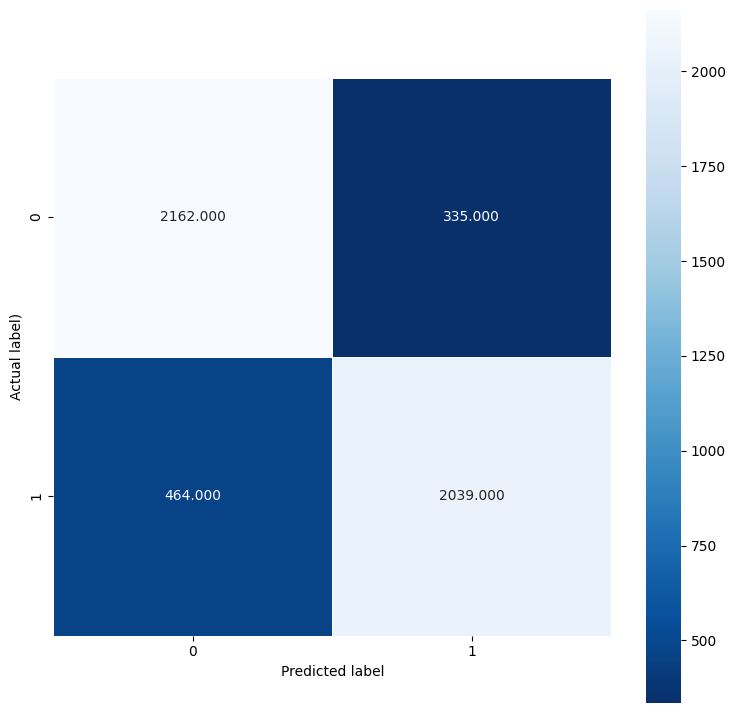

In [155]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label)');
plt.xlabel('Predicted label');

TF-IDF

In [182]:
tf_vectorizer = TfidfVectorizer()
X_train_tf= tf_vectorizer.fit_transform(x_train)
X_test_tf= tf_vectorizer.transform(x_test)

In [183]:
nbc_tf = MultinomialNB()
nbc_tf.fit(X_train_tf, y_train)

MultinomialNB()

In [186]:
y_test_predict_tf= nbc_tf.predict(X_test_tf)
y_test_predict_tf

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [187]:
print("Accuracy:",accuracy_score(y_test,y_test_predict_tf))
print("Precision:",precision_score(y_test,y_test_predict_tf))
print("Recall:",recall_score(y_test,y_test_predict_tf))
print("f1 score:",f1_score(y_test,y_test_predict_tf))
print("ROC AUC Score:",roc_auc_score(y_test,y_test_predict_tf))
print("confusion Matrix:\n",confusion_matrix(y_test,y_test_predict_tf))
print("classification Matrix:",classification_report(y_test,y_test_predict_tf))

Accuracy: 0.852
Precision: 0.8653128885205139
Recall: 0.8341989612465042
f1 score: 0.8494711147274207
ROC AUC Score: 0.8520213869107972
confusion Matrix:
 [[2172  325]
 [ 415 2088]]
classification Matrix:               precision    recall  f1-score   support

           0       0.84      0.87      0.85      2497
           1       0.87      0.83      0.85      2503

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [188]:
cm=confusion_matrix(y_test,y_test_predict_nbc)
cm

array([[2162,  335],
       [ 464, 2039]], dtype=int64)

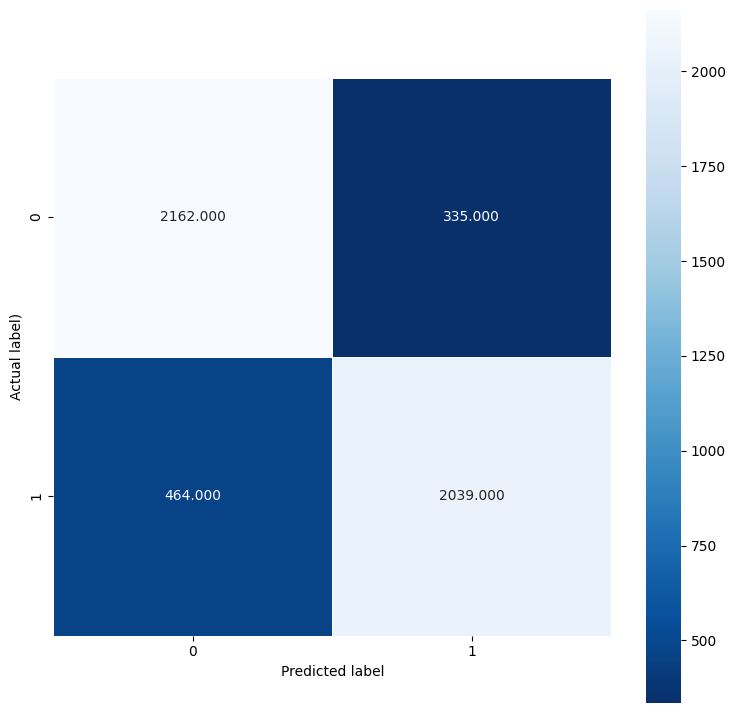

In [189]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label)');
plt.xlabel('Predicted label');

# Prediction with new data

In [193]:
def predict(review):
    pp_review =processing(review)
    stem= stemming(pp_review)
    review= tf_vectorizer.transform([stem])
    predicted= nbc_tf.predict(review)[0]
    sentiment= "Positive" if predicted== 1 else "Negative"
    return sentiment

In [194]:
def sentiment_analysis():
  num_reviews = 5
  for _ in range(num_reviews):
      review = input("\nEnter your movie review ({} reviews left): ".format(num_reviews))
      if review.lower() == "exit":
          break
      sentiment = predict(review)
      print("Predicted sentiment:", sentiment)
      num_reviews -= 1

In [196]:
sentiment_analysis()


Enter your movie review (5 reviews left):  fight scene
Predicted sentiment: Negative

Enter your movie review (4 reviews left):  Awesome Movie
Predicted sentiment: Positive

Enter your movie review (3 reviews left): a bit fine
Predicted sentiment: Positive

Enter your movie review (2 reviews left): boring
Predicted sentiment: Negative

Enter your movie review (1 reviews left): cool
Predicted sentiment: Negative
